In [5]:
import torchvision
import torch
from torchinfo import summary
from torchvision.models.detection.ssdlite import SSDLite320_MobileNet_V3_Large_Weights

model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(weights=SSDLite320_MobileNet_V3_Large_Weights.COCO_V1)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# freeze all layers
for param in model.parameters():
    param.requires_grad = False

In [6]:
summary(model=model, 
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                                Input Shape          Output Shape         Param #              Trainable
SSD (SSD)                                                              [32, 3, 224, 224]    [300, 4]             --                   False
├─GeneralizedRCNNTransform (transform)                                 [32, 3, 224, 224]    [32, 3, 320, 320]    --                   --
├─SSDLiteFeatureExtractorMobileNet (backbone)                          [32, 3, 320, 320]    [32, 128, 1, 1]      --                   False
│    └─Sequential (features)                                           --                   --                   --                   False
│    │    └─Sequential (0)                                             [32, 3, 320, 320]    [32, 672, 20, 20]    (869,096)            False
│    │    └─Sequential (1)                                             [32, 672, 20, 20]    [32, 480, 10, 10]    (751,416)            False
│    └─ModuleList (

In [22]:
model.head.classification_head = torch.nn.Sequential(
                torch.nn.Linear(in_features= 200, 
                                out_features=2, # same number of output units as our number of classes
                                bias=True)).to(device)

In [23]:
summary(model=model, 
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

RuntimeError: Failed to run torchinfo. See above stack traces for more details. Executed layers up to: [GeneralizedRCNNTransform: 1, SSDLiteFeatureExtractorMobileNet: 1, Sequential: 3, Conv2dNormActivation: 4, Conv2d: 5, BatchNorm2d: 5, Hardswish: 5, InvertedResidual: 4, Sequential: 5, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, ReLU: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, InvertedResidual: 4, Sequential: 5, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, ReLU: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, ReLU: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, InvertedResidual: 4, Sequential: 5, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, ReLU: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, ReLU: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, InvertedResidual: 4, Sequential: 5, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, ReLU: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, ReLU: 7, SqueezeExcitation: 6, AdaptiveAvgPool2d: 7, Conv2d: 7, ReLU: 7, Conv2d: 7, Hardsigmoid: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, InvertedResidual: 4, Sequential: 5, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, ReLU: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, ReLU: 7, SqueezeExcitation: 6, AdaptiveAvgPool2d: 7, Conv2d: 7, ReLU: 7, Conv2d: 7, Hardsigmoid: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, InvertedResidual: 4, Sequential: 5, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, ReLU: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, ReLU: 7, SqueezeExcitation: 6, AdaptiveAvgPool2d: 7, Conv2d: 7, ReLU: 7, Conv2d: 7, Hardsigmoid: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, InvertedResidual: 4, Sequential: 5, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, Hardswish: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, Hardswish: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, InvertedResidual: 4, Sequential: 5, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, Hardswish: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, Hardswish: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, InvertedResidual: 4, Sequential: 5, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, Hardswish: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, Hardswish: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, InvertedResidual: 4, Sequential: 5, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, Hardswish: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, Hardswish: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, InvertedResidual: 4, Sequential: 5, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, Hardswish: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, Hardswish: 7, SqueezeExcitation: 6, AdaptiveAvgPool2d: 7, Conv2d: 7, ReLU: 7, Conv2d: 7, Hardsigmoid: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, InvertedResidual: 4, Sequential: 5, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, Hardswish: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, Hardswish: 7, SqueezeExcitation: 6, AdaptiveAvgPool2d: 7, Conv2d: 7, ReLU: 7, Conv2d: 7, Hardsigmoid: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, Conv2dNormActivation: 4, Conv2d: 5, BatchNorm2d: 5, Hardswish: 5, Sequential: 3, Sequential: 4, Conv2dNormActivation: 5, Conv2d: 6, BatchNorm2d: 6, Hardswish: 6, SqueezeExcitation: 5, AdaptiveAvgPool2d: 6, Conv2d: 6, ReLU: 6, Conv2d: 6, Hardsigmoid: 6, Conv2dNormActivation: 5, Conv2d: 6, BatchNorm2d: 6, InvertedResidual: 4, Sequential: 5, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, Hardswish: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, Hardswish: 7, SqueezeExcitation: 6, AdaptiveAvgPool2d: 7, Conv2d: 7, ReLU: 7, Conv2d: 7, Hardsigmoid: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, InvertedResidual: 4, Sequential: 5, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, Hardswish: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, Hardswish: 7, SqueezeExcitation: 6, AdaptiveAvgPool2d: 7, Conv2d: 7, ReLU: 7, Conv2d: 7, Hardsigmoid: 7, Conv2dNormActivation: 6, Conv2d: 7, BatchNorm2d: 7, Conv2dNormActivation: 4, Conv2d: 5, BatchNorm2d: 5, Hardswish: 5, Sequential: 3, Conv2dNormActivation: 4, Conv2d: 5, BatchNorm2d: 5, ReLU6: 5, Conv2dNormActivation: 4, Conv2d: 5, BatchNorm2d: 5, ReLU6: 5, Conv2dNormActivation: 4, Conv2d: 5, BatchNorm2d: 5, ReLU6: 5, Sequential: 3, Conv2dNormActivation: 4, Conv2d: 5, BatchNorm2d: 5, ReLU6: 5, Conv2dNormActivation: 4, Conv2d: 5, BatchNorm2d: 5, ReLU6: 5, Conv2dNormActivation: 4, Conv2d: 5, BatchNorm2d: 5, ReLU6: 5, Sequential: 3, Conv2dNormActivation: 4, Conv2d: 5, BatchNorm2d: 5, ReLU6: 5, Conv2dNormActivation: 4, Conv2d: 5, BatchNorm2d: 5, ReLU6: 5, Conv2dNormActivation: 4, Conv2d: 5, BatchNorm2d: 5, ReLU6: 5, Sequential: 3, Conv2dNormActivation: 4, Conv2d: 5, BatchNorm2d: 5, ReLU6: 5, Conv2dNormActivation: 4, Conv2d: 5, BatchNorm2d: 5, ReLU6: 5, Conv2dNormActivation: 4, Conv2d: 5, BatchNorm2d: 5, ReLU6: 5, SSDLiteRegressionHead: 2, Sequential: 4, Conv2dNormActivation: 5, Conv2d: 6, BatchNorm2d: 6, ReLU6: 6, Conv2d: 5, Sequential: 4, Conv2dNormActivation: 5, Conv2d: 6, BatchNorm2d: 6, ReLU6: 6, Conv2d: 5, Sequential: 4, Conv2dNormActivation: 5, Conv2d: 6, BatchNorm2d: 6, ReLU6: 6, Conv2d: 5, Sequential: 4, Conv2dNormActivation: 5, Conv2d: 6, BatchNorm2d: 6, ReLU6: 6, Conv2d: 5, Sequential: 4, Conv2dNormActivation: 5, Conv2d: 6, BatchNorm2d: 6, ReLU6: 6, Conv2d: 5, Sequential: 4, Conv2dNormActivation: 5, Conv2d: 6, BatchNorm2d: 6, ReLU6: 6, Conv2d: 5]

In [21]:
from torchviz import make_dot
from PIL import Image
from torchvision import transforms


image_path = "football-players-detection/train/images/2e57b9_1_8_png.rf.3ad6daa99d04cabafdb0a2d7a80d68dc.jpg"

img = Image.open(image_path)
convert_tensor = transforms.ToTensor()

device = torch.device('cpu') # force CPU, for now
model.to(device)
model.eval()

#labels = ["PLACEHOLDER"]
input = [convert_tensor(img), convert_tensor(img)]

yhat = model(input) # Give dummy batch to forward().

make_dot(yhat, params=dict(list(model.named_parameters()))).render("rnn_torchviz", format="png")


TypeError: unhashable type: 'list'

In [1]:
import torchvision
import torch
from torchinfo import summary
from torchvision.models.detection.ssdlite import SSDLite320_MobileNet_V3_Large_Weights

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
num_classes = 2

# load an empty model
new_model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(weights=None, num_classes=num_classes, weights_backbone=True)

# load a model with pretrained weights, of which we'll clear the output layers using the empty model
model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(weights=SSDLite320_MobileNet_V3_Large_Weights.COCO_V1)



model.head.classification_head = new_model.head.classification_head


# freeze all layers
for param in model.parameters():
    param.requires_grad = False
for param in model.head.parameters():
    param.requires_grad = True 

c:\Users\danie\miniconda3\envs\footballtracking\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\danie\miniconda3\envs\footballtracking\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights_backbone' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights_backbone=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights_backbone=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
summary(model=new_model, 
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                                Input Shape          Output Shape         Param #              Trainable
SSD (SSD)                                                              [32, 3, 224, 224]    [141, 4]             --                   True
├─GeneralizedRCNNTransform (transform)                                 [32, 3, 224, 224]    [32, 3, 320, 320]    --                   --
├─SSDLiteFeatureExtractorMobileNet (backbone)                          [32, 3, 320, 320]    [32, 128, 1, 1]      --                   True
│    └─Sequential (features)                                           --                   --                   --                   True
│    │    └─Sequential (0)                                             [32, 3, 320, 320]    [32, 672, 20, 20]    869,096              True
│    │    └─Sequential (1)                                             [32, 672, 20, 20]    [32, 960, 10, 10]    2,102,856            True
│    └─ModuleList (extra

In [2]:
from PIL import Image
from torchvision import transforms
image_path = "SOD_Dataset/images/sample_0.jpg"
image_path = "football-players-detection/train/images/2e57b9_1_8_png.rf.3ad6daa99d04cabafdb0a2d7a80d68dc.jpg"

img = Image.open(image_path)

convert_tensor = transforms.ToTensor()

device = torch.device('cpu') # force CPU, for now
model.to(device)
model.eval()


#labels = ["PLACEHOLDER"]
inputs = [convert_tensor(img)]

#inputs, labels = inputs.to(device), labels.to(device)

output = model(inputs)



import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

from torchvision.utils import draw_bounding_boxes, save_image
from torchvision.io import read_image

image_disp = read_image(image_path)

boxes = output[0]['boxes']
labels = output[0]['labels'].tolist()
labels = [str(i) for i in labels]
#labels = [str(1)] * 300

result = draw_bounding_boxes(image_disp, boxes, labels=labels, width=3)
show(result)


#npimg = np.transpose(result.numpy(), (1, 2, 0))
#result = Image.fromarray(npimg)
save_image(result.float(), 'img1.jpg')

RuntimeError: Given groups=960, weight of size [960, 1, 3, 3], expected input[1, 480, 10, 10] to have 960 channels, but got 480 channels instead

In [55]:
from PIL import Image
from torchvision import transforms

image_path = "SOD_Dataset/images/sample_0.jpg"
image_path = "football-players-detection/train/images/2e57b9_1_8_png.rf.3ad6daa99d04cabafdb0a2d7a80d68dc.jpg"

img = Image.open(image_path)

convert_tensor = transforms.ToTensor()


AttributeError: 'SSD' object has no attribute 'size'

In [24]:
from functools import partial
from torch import nn, Tensor
from torch import _utils as det_utils


def get_model_instance_segmentation(num_classes):
    # load an instance segmentation model pre-trained on COCO
    model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(weights=SSDLite320_MobileNet_V3_Large_Weights.COCO_V1)

    # get number of input features for the classifier
    #in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    #model.roi_heads.box_predictor = SSDLite320_MobileNet_V3_Large_Weights(in_features, num_classes)

    #model.classification_head = 0

    #model.regression_head = 0

    norm_layer = partial(nn.BatchNorm2d, eps=0.001, momentum=0.03)

    #out_channels = det_utils.retrieve_out_channels(backbone, size)
    num_anchors = model.anchor_generator.num_anchors_per_location()

    print(num_anchors)
    out_channels = [3 for x in num_anchors]



    model.head = torchvision.models.detection.ssdlite.SSDLiteHead(out_channels, num_anchors, num_classes, norm_layer),
    

    # now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    # and replace the mask predictor with a new one
    model.roi_heads.mask_predictor = SSDLite320_MobileNet_V3_Large_Weights(in_features_mask,
                                                       hidden_layer,
                                                       num_classes)

    return model

In [25]:
model = get_model_instance_segmentation(2)



[6, 6, 6, 6, 6, 6]


TypeError: cannot assign 'tuple' as child module 'head' (torch.nn.Module or None expected)

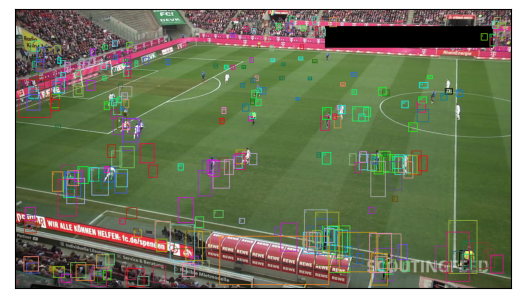

In [108]:
from torchvision.utils import draw_bounding_boxes, save_image
from torchvision.io import read_image

image_disp = read_image(image_path)

boxes = output[0]['boxes']
labels = output[0]['labels'].tolist()
labels = [str(i) for i in labels]
#labels = [str(1)] * 300

result = draw_bounding_boxes(image_disp, boxes, labels=labels, width=3)
show(result)


#npimg = np.transpose(result.numpy(), (1, 2, 0))
#result = Image.fromarray(npimg)
save_image(result.float(), 'img1.jpg')